## Obteniendo la data

In [1]:
!git clone https://github.com/LuizIgnacio2002/Tulipan-Roses.git


fatal: destination path 'Tulipan-Roses' already exists and is not an empty directory.


In [2]:
import os
os.chdir('Tulipan-Roses/flowers')


In [3]:
print(os.listdir("../flowers"))

['Tulipan-Roses', 'daisy', 'dandelion', 'sunflower', 'weights.weights.h5', 'tulip', 'rose']


In [4]:
ROSE_DIR = "../flowers/rose"
TULIP_DIR = "../flowers/tulip"
FLOWER_NAMES = ['rose', 'tulip']
DIR = [ ROSE_DIR, TULIP_DIR]

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import to_categorical


import cv2

In [6]:
def create_training_data(flower_name, flower_dir,img_size):
    """
        flower_name = string
        flower_dir = input path
        img_size = tuple (containing size of resized image)
    """
    X = []
    y = []
    for num,i in enumerate(flower_dir):
        for j in tqdm(os.listdir(i)):
            path = os.path.join(i,j)
            img = cv2.imread(path, cv2.IMREAD_COLOR)
            try:
                img = cv2.resize(img, img_size)
            except:
                continue

            X.append(np.array(img))
            y.append(flower_name[num])

    return X,y

In [7]:
X,y = create_training_data(FLOWER_NAMES, DIR, (200,200))

100%|██████████| 984/984 [00:02<00:00, 444.54it/s]


In [8]:
def view_random_images(X, y, random_state = 42):
    np.random.seed(random_state)
    plt.figure(figsize = (6,12))

    for i in range(10):
        plt.subplot(5,2,i+1)
        num = np.random.randint(len(X))
        plt.imshow(X[num])
        plt.title(y[num])

    plt.tight_layout()

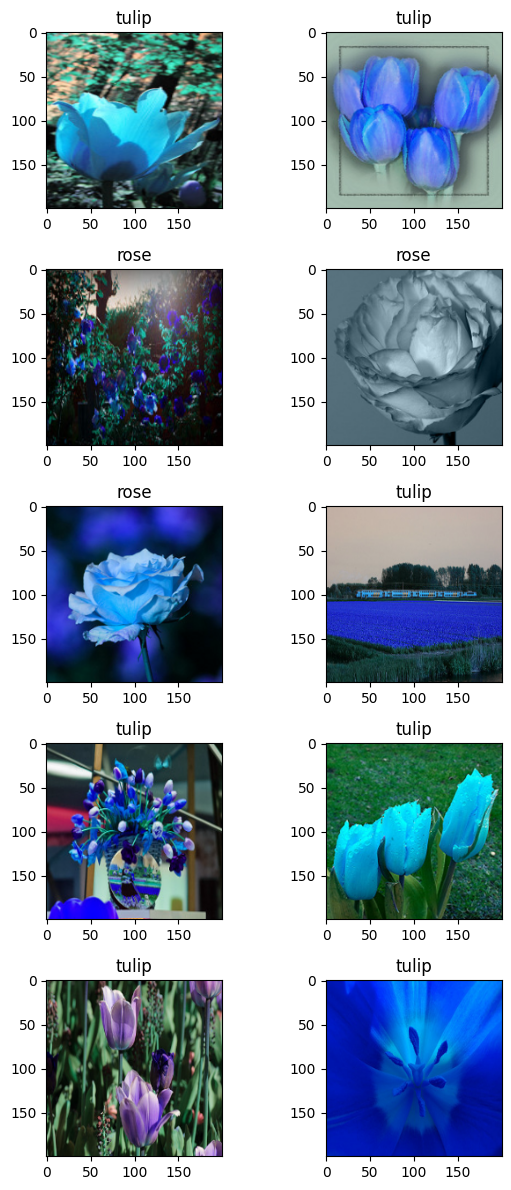

In [9]:
view_random_images(X,y, random_state = 100)

In [10]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y,2)

## Haciendo un split del dataset

In [11]:
X = (np.array(X))/255
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
del X
del y

In [12]:
np.random.seed(42)

In [13]:
cnn = Sequential()

# Specify input_shape only in the first Conv2D layer
cnn.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', activation='relu', input_shape=(200,200,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization(axis=1))
cnn.add(Dropout(0.2))

# No need to specify input_shape in the following layers
cnn.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization(axis=1))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=64, kernel_size=(4,4), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization(axis=1))
cnn.add(Dropout(0.2))

cnn.add(Conv2D(filters=96, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(BatchNormalization(axis=1))

cnn.add(Flatten())
cnn.add(Dropout(0.15))
cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dense(512, activation='relu'))
cnn.add(BatchNormalization())
cnn.add(Dense(2, activation='softmax'))


cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 200, 200, 16)        │           1,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 100, 16)        │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 32)        │          12,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50, 50, 32)          │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25, 25, 64)          │             100 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 25, 25, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 96)          │              48 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 13824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 13824)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       7,078,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 7,449,198 (28.42 MB)

 Trainable params: 7,446,776 (28.41 MB)

 Non-trainable params: 2,422 (9.46 KB)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.16, # Randomly zoom image
        width_shift_range=0.32,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.32,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(X_train)

## Entrenando el modelo

In [16]:
#train = cnn.fit_generator(datagen.flow(X_train,y_train, batch_size=100),
#                              epochs = 10, validation_data = (X_test,y_test),
#                              verbose = 1, steps_per_epoch = X_train.shape[0])

batch_size = 100

epochs = 24


train = cnn.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_test,y_test),
                              verbose = 1, steps_per_epoch=X_train.shape[0]//16)

# Explicitly specify the save format as TensorFlow or HDF5
cnn.save_weights('weights.weights.h5')


Epoch 1/24


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/88 ━━━━━━━━━━━━━━━━━━━━ 9:54 8s/step - accuracy: 0.5540 - loss: 1.4979

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


88/88 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.5509 - loss: 1.2381 - val_accuracy: 0.5480 - val_loss: 0.8469
Epoch 2/24
88/88 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5876 - loss: 0.7505 - val_accuracy: 0.4548 - val_loss: 1.2812
Epoch 3/24
88/88 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6034 - loss: 0.7082 - val_accuracy: 0.4548 - val_loss: 1.7655
Epoch 4/24
88/88 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.5739 - loss: 0.7191 - val_accuracy: 0.4548 - val_loss: 1.4583
Epoch 5/24
88/88 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.6163 - loss: 0.6850 - val_accuracy: 0.4548 - val_loss: 1.5960
Epoch 6/24
88/88 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6126 - loss: 0.6790 - val_accuracy: 0.4548 - val_loss: 2.5063
Epoch 7/24
88/88 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.6451 - loss: 0.6334 - val_accuracy: 0.4548 - val_loss: 2.6507
Epoch 8/24
88/88 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.6361 - loss: 0.6523 - val_accuracy: 0.4548 - val_loss: 4.

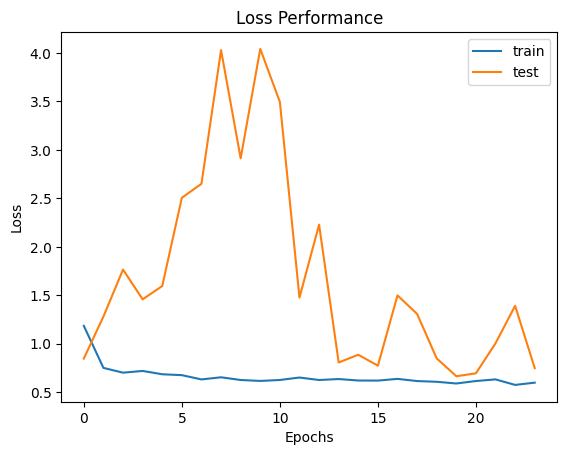

In [17]:

plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Loss Performance')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

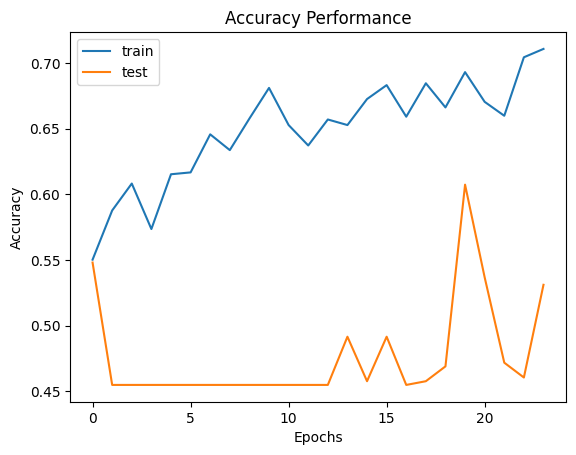

In [18]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('Accuracy Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [19]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")
    image = load_img(file_path, target_size=(200, 200))
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.
    return image

In [20]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import time

# Adjust image reading and preprocessing based on your model's input requirements
def read_image(path, target_size=(200, 200)):
    # Load the image, resize it, and convert it to an array
    img = load_img(path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def test_single_image(path):
    flowers = ['rose', 'tulip']
    images = read_image(path)  # Preprocess the image
    time.sleep(.5)

    # Make predictions using your CNN model
    bt_prediction = cnn.predict(images)  # Predict the class probabilities
    preds = bt_prediction[0]  # Extract the predicted probabilities for each class

    # Print predicted probabilities for each class
    for idx, flower, x in zip(range(0, 2), flowers, preds):  # 2 because you have 2 classes (rose, tulip)
        print(f"ID: {idx}, Label: {flower}, {round(x * 100, 2)}%")

    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.' * (x + 1))
        time.sleep(.2)

    # Final class prediction (rose or tulip)
    class_predicted = np.argmax(bt_prediction)  # Get the index of the highest probability
    print(f"ID: {class_predicted}, Label: {flowers[class_predicted]}")  # Map index to label

    return load_img(path)  # Return the image for visualization


## Probando el modelo

In [21]:
import requests
from io import BytesIO
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import time
from PIL import Image

# Function to read image from URL or local path
def read_image(path, target_size=(200, 200)):
    if path.startswith('http'):  # Check if the path is a URL
        response = requests.get(path)  # Download the image
        img = Image.open(BytesIO(response.content))  # Load image into PIL
    else:
        img = load_img(path, target_size=target_size)  # Load local image

    # Resize the image and convert it to an array
    img = img.resize(target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to test the single image
def test_single_image(path):
    flowers = ['rose', 'tulip']
    images = read_image(path)  # Preprocess the image
    time.sleep(.5)

    # Make predictions using your CNN model
    bt_prediction = cnn.predict(images)  # Predict the class probabilities
    preds = bt_prediction[0]  # Extract the predicted probabilities for each class

    # Print predicted probabilities for each class
    for idx, flower, x in zip(range(0, 2), flowers, preds):  # 2 because you have 2 classes (rose, tulip)
        print(f"ID: {idx}, Label: {flower}, {round(x * 100, 2)}%")

    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.' * (x + 1))
        time.sleep(.2)

    # Final class prediction (rose or tulip)
    class_predicted = np.argmax(bt_prediction)  # Get the index of the highest probability
    print(f"ID: {class_predicted}, Label: {flowers[class_predicted]}")  # Map index to label

    return Image.open(BytesIO(requests.get(path).content)) if path.startswith('http') else load_img(path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
ID: 0, Label: rose, 100.0%
ID: 1, Label: tulip, 0.0%
Final Decision:
.
..
...
ID: 0, Label: rose


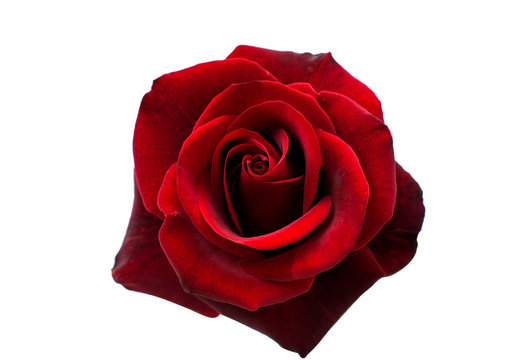

In [25]:
# Call this function with the URL of the image you want to test
url = 'https://t3.ftcdn.net/jpg/01/05/57/38/360_F_105573812_cvD4P5jo6tMPhZULX324qUYFbNpXlisD.jpg'
test_single_image(url)
